# Описание проекта:

Перед нами данные российской авиакомпании, выполняющей внутренние пассажирские авиаперевозки. Сотни перелётов каждый день. Необходимо понять и определить предпочтения пользователей, покупающих билеты на те или иные направления.

# Цель:

Изучить и провести исследовательский анализ данных полученных из баз данных нами ранее.


# План проекта:

 1. Подготовить полученные данные
   * импортировать файлы;
   * изучить данные;
   * проверить типы данных на корректность.
   
   
 2. Провести исследовательский анализ данных:
  * выбрать топ-10 городов по количеству рейсов;
  * построить графики: модели самолетов и количество рейсов, города и количество рейсов, топ-10 городов и количество рейсов.
   
 3. Написать общий вывод о проведённом анализе

# Оглавление
# 1.[Открытие данных](#1) 
# 2.[Предобработка данных](#2) 
# 3.[Анализ данных](#3) 
# 4.[Общий вывод](#4)

# Шаг 1. Откроем файл с данными и изучим общую информацию.<a id="1"></a>

In [1]:
# загрузим наши файлы и посмотрим краткую информацию о типах данных, столбцах и их содеражнии:
import pandas as pd
import matplotlib.pyplot as plt

data_model = pd.read_csv('/datasets/query_1.csv')
data_city = pd.read_csv('/datasets/query_3.csv')


data_model.info(memory_usage='deep')
print()
data_city.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
model             8 non-null object
flights_amount    8 non-null int64
dtypes: int64(1), object(1)
memory usage: 775.0 bytes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
city               101 non-null object
average_flights    101 non-null float64
dtypes: float64(1), object(1)
memory usage: 10.7 KB


In [2]:
# визуально осмотрим  строки из датафрейма:
data_model.head(10)

,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300
5,Bombardier CRJ-200,4446
6,Cessna 208 Caravan,4557
7,Sukhoi SuperJet-100,4185


In [3]:
# визуально осмотрим  строки из датафрейма:
data_city.head(10)

,city,average_flights
0,Абакан,3.870968
1,Анадырь,1.000000
2,Анапа,2.161290
3,Архангельск,5.354839
4,Астрахань,2.451613
5,Барнаул,2.612903
6,Белгород,6.000000
7,Белоярский,2.000000
8,Благовещенск,1.000000
9,Братск,1.000000


In [4]:
# рассмотрим числовое описание датафрейма:
data_model.describe()

,flights_amount
count,8.000000
mean,2035.625000
std,1965.203947
min,300.000000
25%,605.250000
50%,795.000000
75%,4250.250000
max,4557.000000


In [5]:
# рассмотрим числовое описание датафрейма:
data_city.describe()

,average_flights
count,101.000000
mean,5.494189
std,13.119790
min,1.000000
25%,2.000000
50%,3.000000
75%,5.870968
max,129.774194


# Вывод:

Данные полученные из баз данных ранее соответствуют ожиданиям и на первый взгляд в корректировке не нуждаются.

# Шаг 2. Подготовим данные:<a id="2"></a>

In [6]:
# приведем все значения к нижнему регистру:
data_model['model']= data_model['model'].str.lower()
data_city['city']=data_city['city'].str.lower()

In [7]:
# Проверим пропуски:
data_city.isnull().sum()

city               0
average_flights    0
dtype: int64

In [8]:
# проверим данные на наличие полных дубликатов:
data_city.duplicated().sum()

0

In [9]:
#  Дополним Данными о населении:
data_city['count_people']= [186797, 15819, 88879, 346979 , 529793, 632391, 394142, 19622, 226385, 226269, 402675,82488, 606561,303597,
                           1008998, 52776, 1058261, 76783, 64464, 305911, 1493749, 404598, 648146, 623562, 274715, 1257391, 489359,
                           332039, 556382, 518348, 67727,244768, 932629, 1093771, 312364, 452976, 119438, 508573, 92052, 413253,
                           603518, 73925, 35390, 12655050, 287847, 44830, 239583, 25151, 57934, 127255, 277668, 240020, 1252236, 549103,
                           1625631, 118033, 181830, 106911, 58565, 1154507, 572188, 226502, 520300, 1055397, 281023, 179586, 210340,
                           1137904, 50976, 1156659, 5384342, 320612, 838042, 29293, 443562, 450680, 40830, 380632, 244403, 292140, 576624,
                           816800, 11970, 439128, 627705, 40537, 37155, 80419, 45555, 1128787, 93716, 616372, 101466, 497618, 1196680, 
                           314834, 351784, 103122, 200636, 322987, 608353]

In [11]:
# Проверим все изменения:
data_city.head(10)

,city,average_flights,count_people
0,абакан,3.870968,186797
1,анадырь,1.000000,15819
2,анапа,2.161290,88879
3,архангельск,5.354839,346979
4,астрахань,2.451613,529793
5,барнаул,2.612903,632391
6,белгород,6.000000,394142
7,белоярский,2.000000,19622
8,благовещенск,1.000000,226385
9,братск,1.000000,226269


In [12]:
# обоготим данные о вместимости каждой модели:
data_model['total_pass'] = [156, 185, 149, 375, 550, 50, 14, 103]

In [13]:
# Проверим все изменения:
data_model.head(10)

,model,flights_amount,total_pass
0,airbus a319-100,607,156
1,airbus a321-200,960,185
2,boeing 737-300,630,149
3,boeing 767-300,600,375
4,boeing 777-300,300,550
5,bombardier crj-200,4446,50
6,cessna 208 caravan,4557,14
7,sukhoi superjet-100,4185,103


# Вывод:

Мы убедились , что данные корректные, не содержат в себе каких-либо критичных аномалий. Писать тикет к инженерам и разработчикам базы данных на исправление чего-либо не нужно.

# Шаг 3. Проведем исследовательский анализ данных:<a id="3"></a>

In [14]:
#Выберем топ-10 городов по количеству рейсов в сутки:
top_10 = data_city.sort_values(by='average_flights',ascending = False).head(10)

In [15]:
display(top_10)

,city,average_flights,count_people
43,москва,129.774194,12655050
70,санкт-петербург,31.161290,5384342
54,новосибирск,17.322581,1625631
33,красноярск,11.580645,1093771
20,екатеринбург,11.322581,1493749
67,ростов-на-дону,10.193548,1137904
63,пермь,10.129032,1055397
10,брянск,10.000000,402675
74,сочи,9.612903,443562
84,ульяновск,9.580645,627705


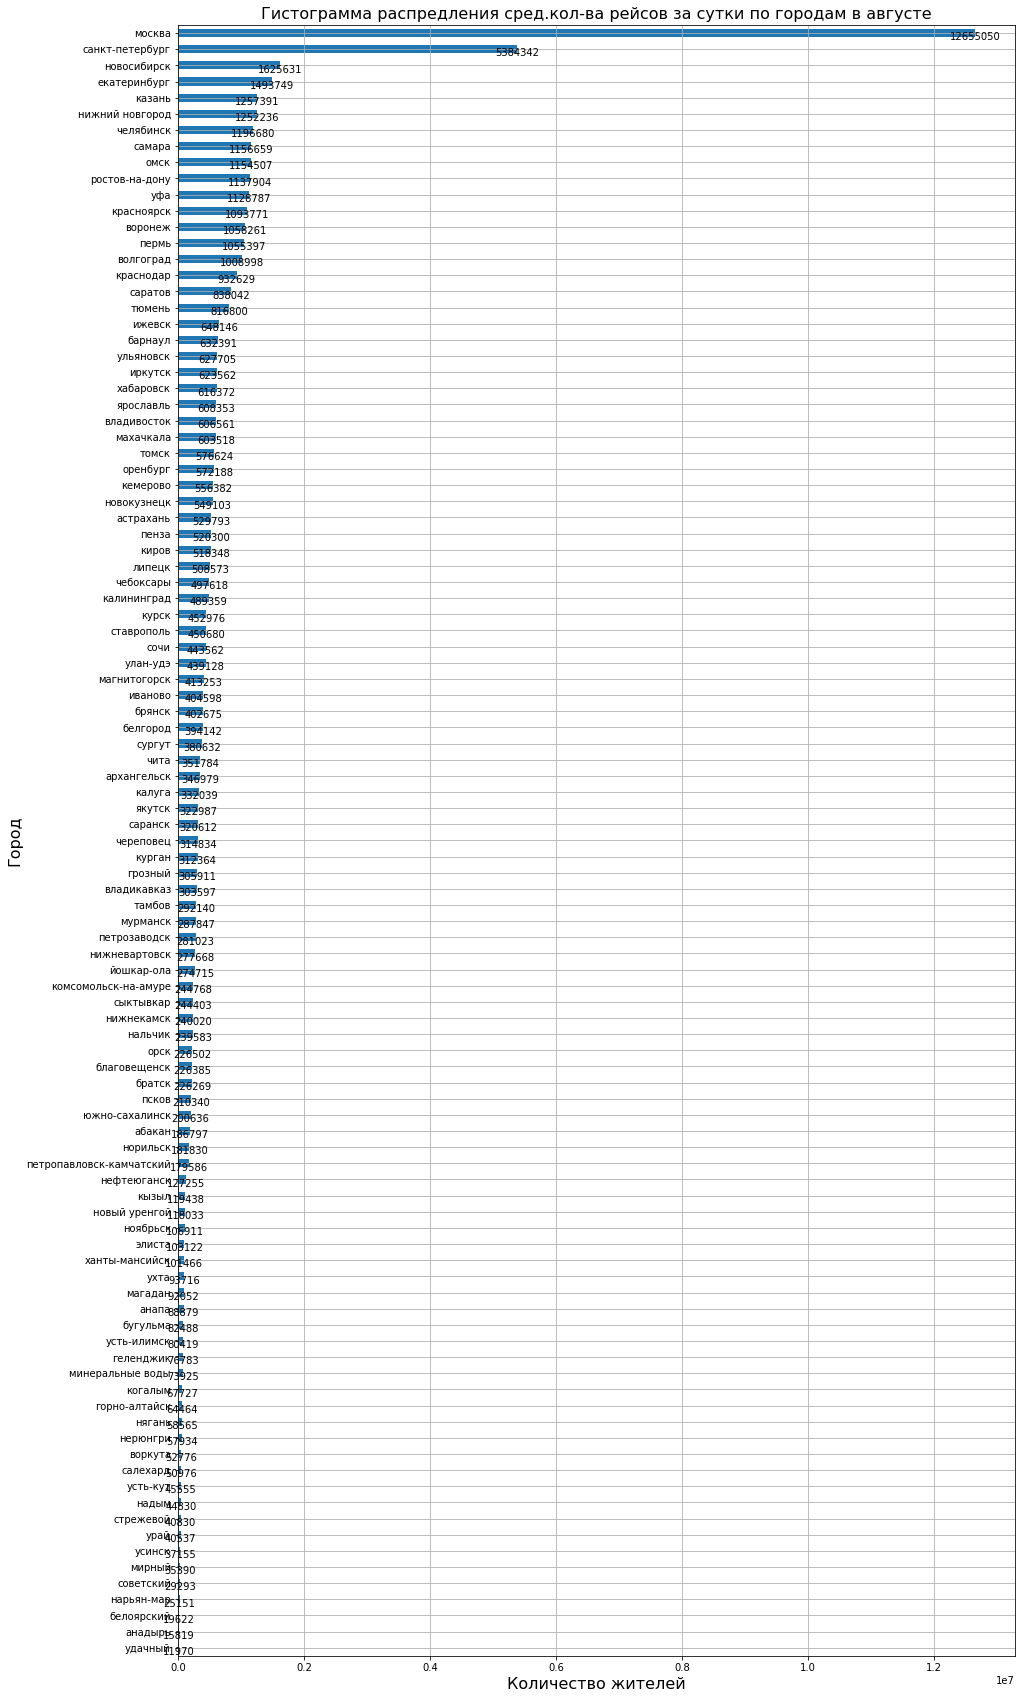

In [16]:
# Построим распредления жителей по городам:
plot = data_city.sort_values(by='count_people').plot(kind ='barh',x='city',y='count_people',figsize=(15, 30), grid=True,legend =False)
for rect in plot.patches:
    width = rect.get_width()
    plot.text(rect.get_width(), rect.get_y(),round(width),ha='center', va='center')

plt.title('Гистограмма распредления сред.кол-ва рейсов за сутки по городам в августе', fontsize=16)
plt.xlabel('Количество жителей', fontsize=16)
plt.ylabel('Город', fontsize=16)
plt.show()

Вывод: Мы определили топ 10 городов с максимальным числом рейсов совершенных каждый день в августе 2018г. (среднее значение). Как и предпологалось, первое место занимает **Москва = 130**, второе **Санкт-Петербург = 31**, третье место **Новосибирск = 17**

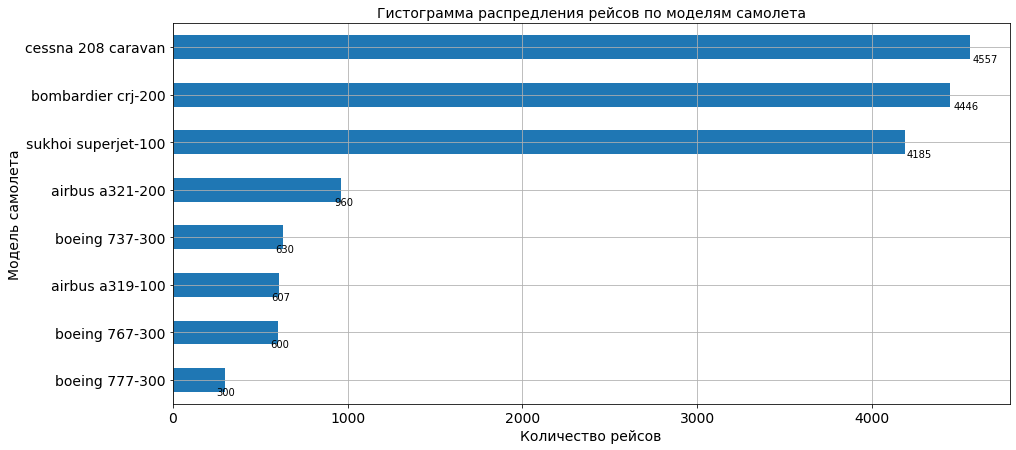

In [17]:
# Построим гистограмму распредления рейсов по моделям самолета :
plot = data_model.sort_values(by='flights_amount').plot(kind ='barh',x='model',y='flights_amount',figsize=(15, 7), grid=True,legend =False, fontsize=14)
for rect in plot.patches:
    width = rect.get_width()
    plot.text(rect.get_width()*1.02, rect.get_y(),round(width,2),ha='center', va='center')
   
plt.title('Гистограмма распредления рейсов по моделям самолета', fontsize=14)
plt.xlabel('Количество рейсов', fontsize=14)
plt.ylabel('Модель самолета', fontsize=14)
plt.show()


In [18]:
# Найдем максимальный пассажиропоток на каждой модели самолета:
data_model['max_pass'] = data_model['total_pass']  * data_model['flights_amount'] 

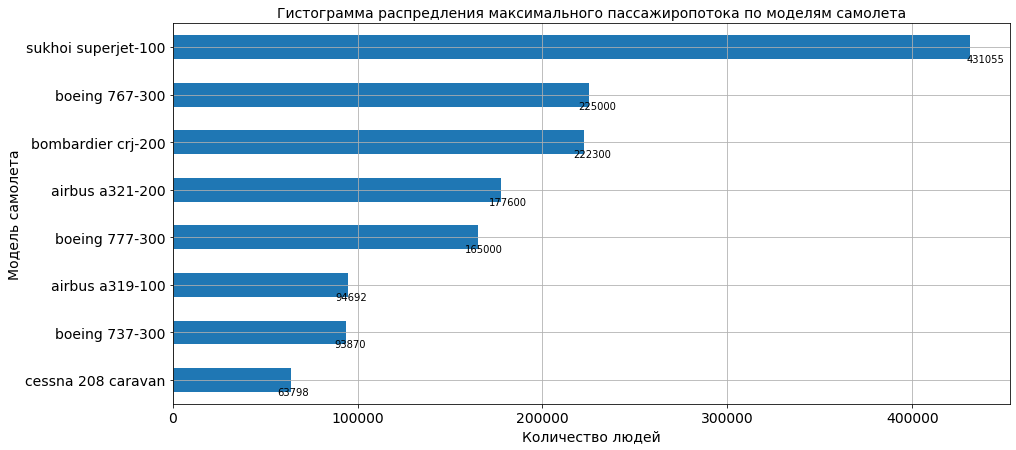

In [19]:
# Построим гистограмму распредления рейсов по моделям самолета :
plot = data_model.sort_values(by='max_pass').plot(kind ='barh',x='model',y='max_pass',figsize=(15, 7), grid=True,legend =False, fontsize=14)
for rect in plot.patches:
    width = rect.get_width()
    plot.text(rect.get_width()*1.02, rect.get_y(),round(width,2),ha='center', va='center')

plt.title('Гистограмма распредления максимального пассажиропотока по моделям самолета', fontsize=14)
plt.xlabel('Количество людей', fontsize=14)
plt.ylabel('Модель самолета', fontsize=14)
plt.show()

Вывод: 
* Определили самые популярные модели самолетов, которые совершили перелеты на территории России в сентябре 2018г. Самым распространненным самолетом оказался  винтовой **Cessna 208 Caravan =4557 рейсов**, второе место **Bombardier CRJ-200 = 4185**, третье место занимает модель самолета **Sukhoi SuperJet-100 = 4185 рейсов**. 
* Если расмматривать пассажиропоток, учитывая максимальную вместимость самолетов, картина меняется на первое место по максимальному пассажиропотоку выходит **Sukhoi SuperJet-100 = 431055**, второе место  у **boeing 767-300 = 225000** и на третьем месте **bombardier crj-200 = 222300**.

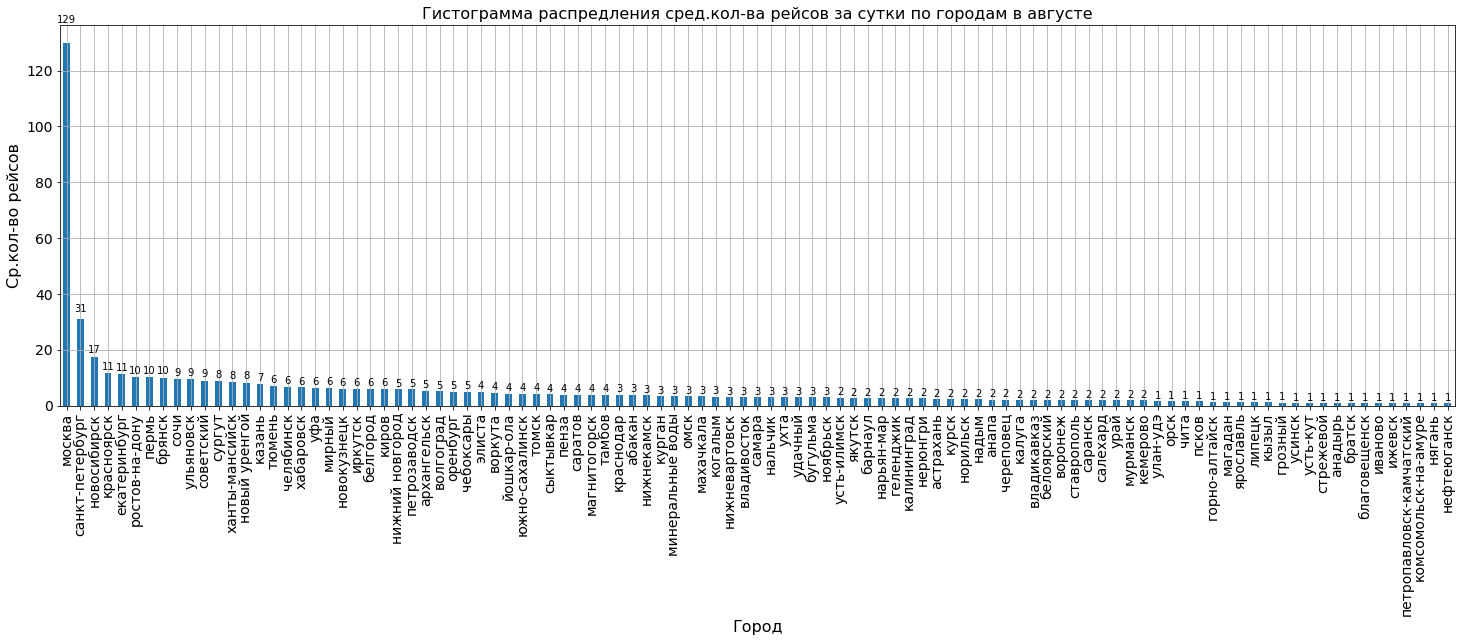

In [20]:
# Построим распредления сред.кол.рейсов за сутки по городам в августе:

plot = data_city.sort_values(by='average_flights',ascending =False).plot(kind ='bar',x='city',y='average_flights',figsize=(25, 7), grid=True,legend =False,fontsize =14 )
for rect in plot.patches:
    height = rect.get_height()
    plot.text(rect.get_x() + rect.get_width()/2., 1.05*height, '%d' % int(height),ha='center', va='bottom')
    
plt.title('Гистограмма распредления сред.кол-ва рейсов за сутки по городам в августе', fontsize=16)
plt.xlabel('Город', fontsize=16)
plt.ylabel('Ср.кол-во рейсов', fontsize=16)
plt.show()

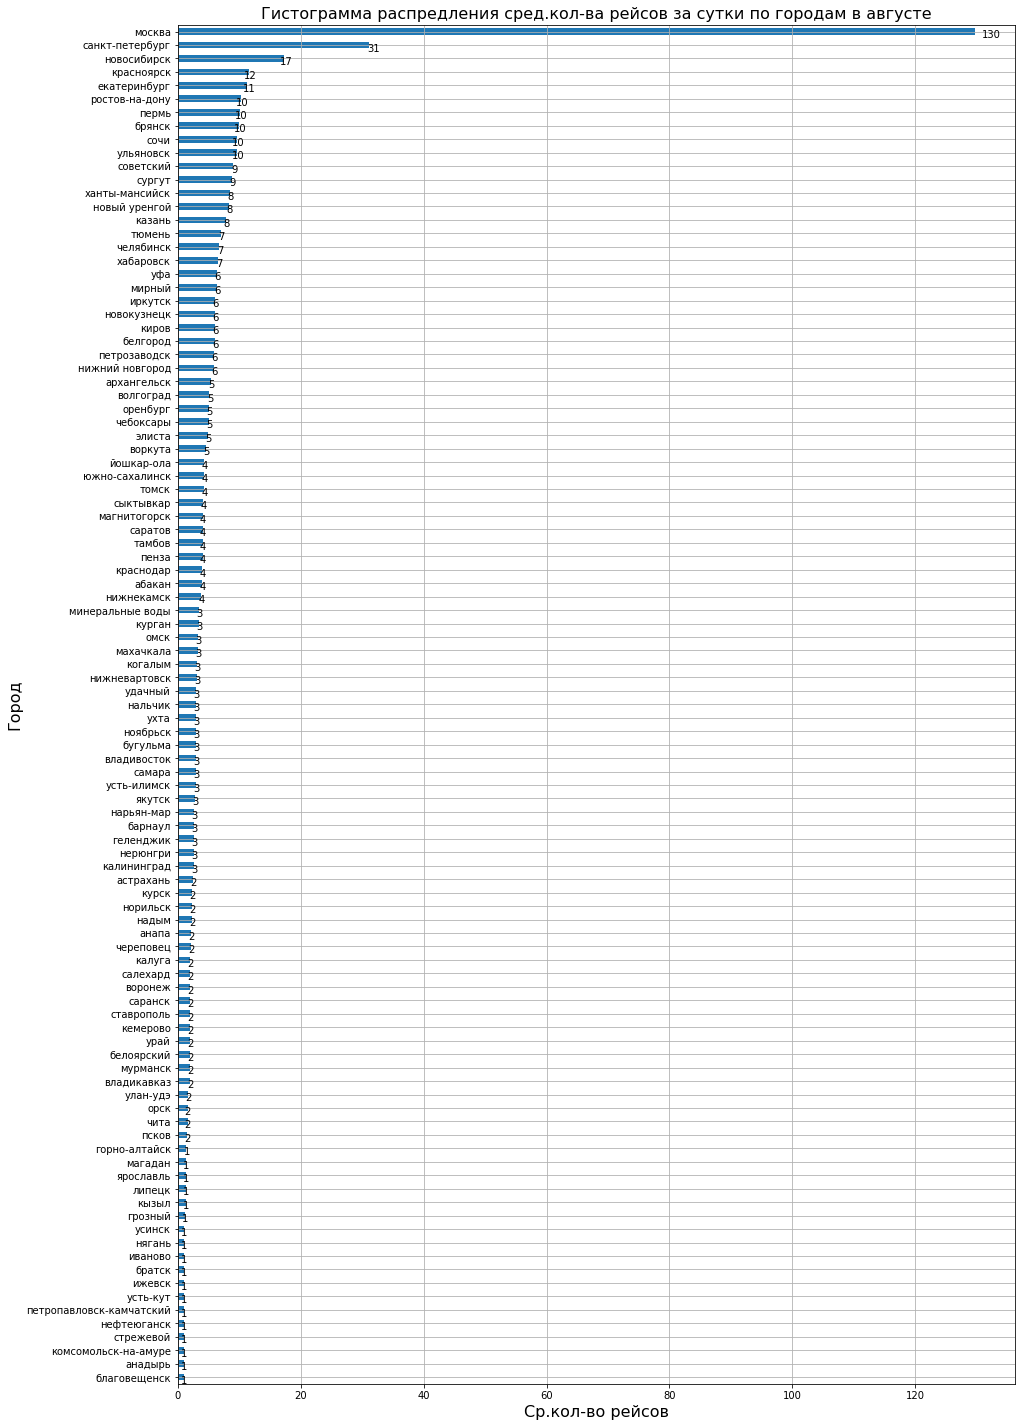

In [21]:
# Построим распредления сред.кол.рейсов за сутки по городам в августе:
plot = data_city.sort_values(by='average_flights').plot(kind ='barh',x='city',y='average_flights',figsize=(15, 25), grid=True,legend =False)
for rect in plot.patches:
    width = rect.get_width()
    plot.text(rect.get_width()*1.02, rect.get_y(),round(width),ha='center', va='center')

plt.title('Гистограмма распредления сред.кол-ва рейсов за сутки по городам в августе', fontsize=16)
plt.xlabel('Ср.кол-во рейсов', fontsize=16)
plt.ylabel('Город', fontsize=16)
plt.show()

Вывод: Построили гистограмму распредления сред.кол-ва рейсов за сутки по городам в августе 2018г. Львинная доля городов, где имеется аэропорт в сутки принимает от 1 до 4 рейсов, что свидетельствует о низком авиатранспортном развитие в России, а следовательно низком внутреннем туризме. 

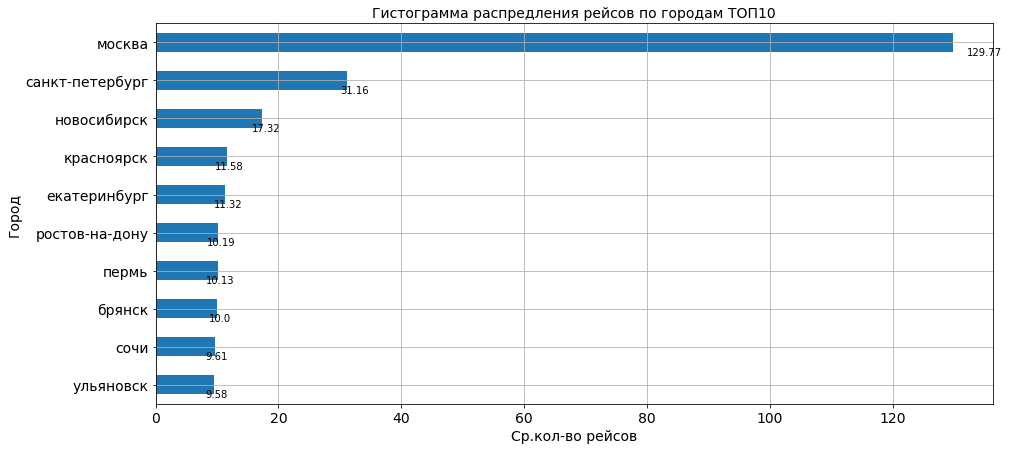

In [22]:
# Построим гистограмму распредления рейсов по городам ТОП10 :
plot = top_10.sort_values(by='average_flights',ascending =True).plot(kind ='barh',x='city',y='average_flights',figsize=(15, 7), grid=True,legend =False, fontsize=14)
for rect in plot.patches:
    width = rect.get_width()
    plot.text(rect.get_width()*1.04, rect.get_y(),round(width,2),ha='center', va='center')

plt.title('Гистограмма распредления рейсов по городам ТОП10' , fontsize=14)
plt.xlabel('Ср.кол-во рейсов', fontsize=14)
plt.ylabel('Город', fontsize=14)
plt.show()

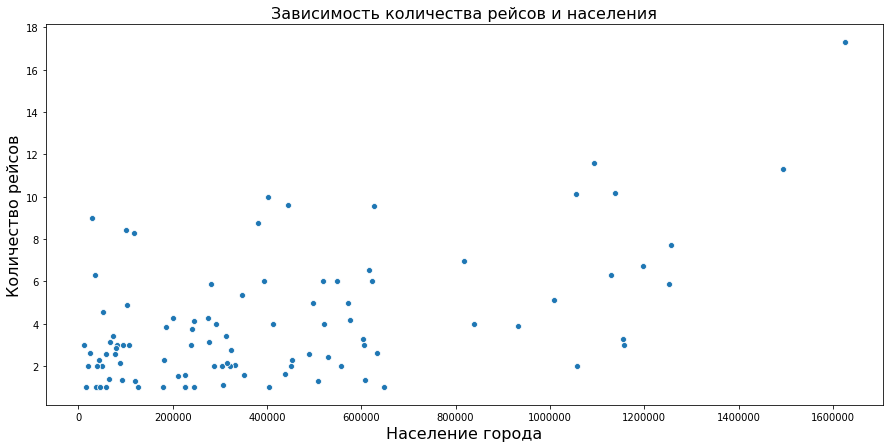

In [23]:
# Построим  график зависимости количества рейсов и населения ( не включив Москву и Санкт-Петербург из-за рзекого отличия в численности):

import seaborn as sns

plt.figure(figsize=(15,7))
sns.scatterplot(x='count_people', y='average_flights', data=data_city.query('city != "москва" and city != "санкт-петербург"'))
plt.title('Зависимость количества рейсов и населения', fontsize=16)
plt.xlabel('Население города', fontsize=16)
plt.ylabel('Количество рейсов', fontsize=16)
plt.show()

In [24]:
# Построим таблицу корреляции для отдельных столбцев (Исключив МСК и СПб):
сorr_parm = data_city.query('city != "москва" and city != "санкт-петербург"')[['average_flights','count_people']].corr().round(2)
display(сorr_parm)

,average_flights,count_people
average_flights,1.00,0.55
count_people,0.55,1.00


Построили график зависимости и таблицу корреляции  населения города на количество рейсов, прослеживается тенденция (коэфф.корр.**0.55**) , что с ростом численности населения растет и количество рейсов. Всплески на графике в населенных пунктах могут быть связаны с тем, что в  даже не больших городах расположены международние аэровокзалы, где чаще всего всегда больше кол-во рейсов или в северо-восточной части РФ мало крупных городов, а добраться до них возможно только воздушным путем.

Виуазльно представили топ10 городов России по рпаспредлению рейсов в августе 2018г. где с большим отрывом лидирует г. Москва.

# Шаг 4. Общий вывод:<a id="4"></a>

* данные полученные из базы данных - корректные;
* Москва, Санкт-Петербург и Новосибирск занимают лидирующие позиции по среднему кол-ву рейсов в сутки в августе 2018г.;
* города России слабо развиты в плане авиаперевозок, в среднем 1-4 рейсов в сутки, за исключением центральных городов;
* самая распространенная модель самолет - это легковесный одномторный винтовой самолет Cessna 208 Caravan ( скорее всего применяется в Сибирской части России для маленьких городов, где невозможно добираться еще каим-либо способом);
* авиапарк в России по большей части устаревший модель Bombardier CRJ-200 занимает второе место, но ее перестали выпуска еще в 2006г.Авиакомпании стремятся заменить  на российскую модель Sukhoi SuperJet-100 которая занимает третье место по рейсам за сутки;
* Airbus и Boeing  не лидируют по количеству рейсов по всей России даже не смотря на большое кол-во в европейской части.
* тройка лидеров  по максимальному пассажиропотоку выходит Sukhoi SuperJet-100 = 431055, второе место  у boeing 767-300 = 225000 и на третьем месте bombardier crj-200 = 222300.